In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [12]:
path = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020'
direcs = direcslist(path, 1)

n = 500
straights = []
for d in direcs:
    img = load_image(d + '/af_corrected.tif')
    roi = np.loadtxt(d + '/ROI_fit.txt')
    straights.append(straighten(img, roi, 50, ninterp=n))

In [13]:
profs = np.zeros([len(direcs), n])
profs_norm = np.zeros([len(direcs), n])
for i, s in enumerate(straights):
    profs[i] = bounded_mean_2d(s, [0, 1])
    profs_norm[i] = profs[i] / np.mean(profs[i][450:])

In [14]:
df = pd.read_csv('df.csv')

<IPython.core.display.Javascript object>


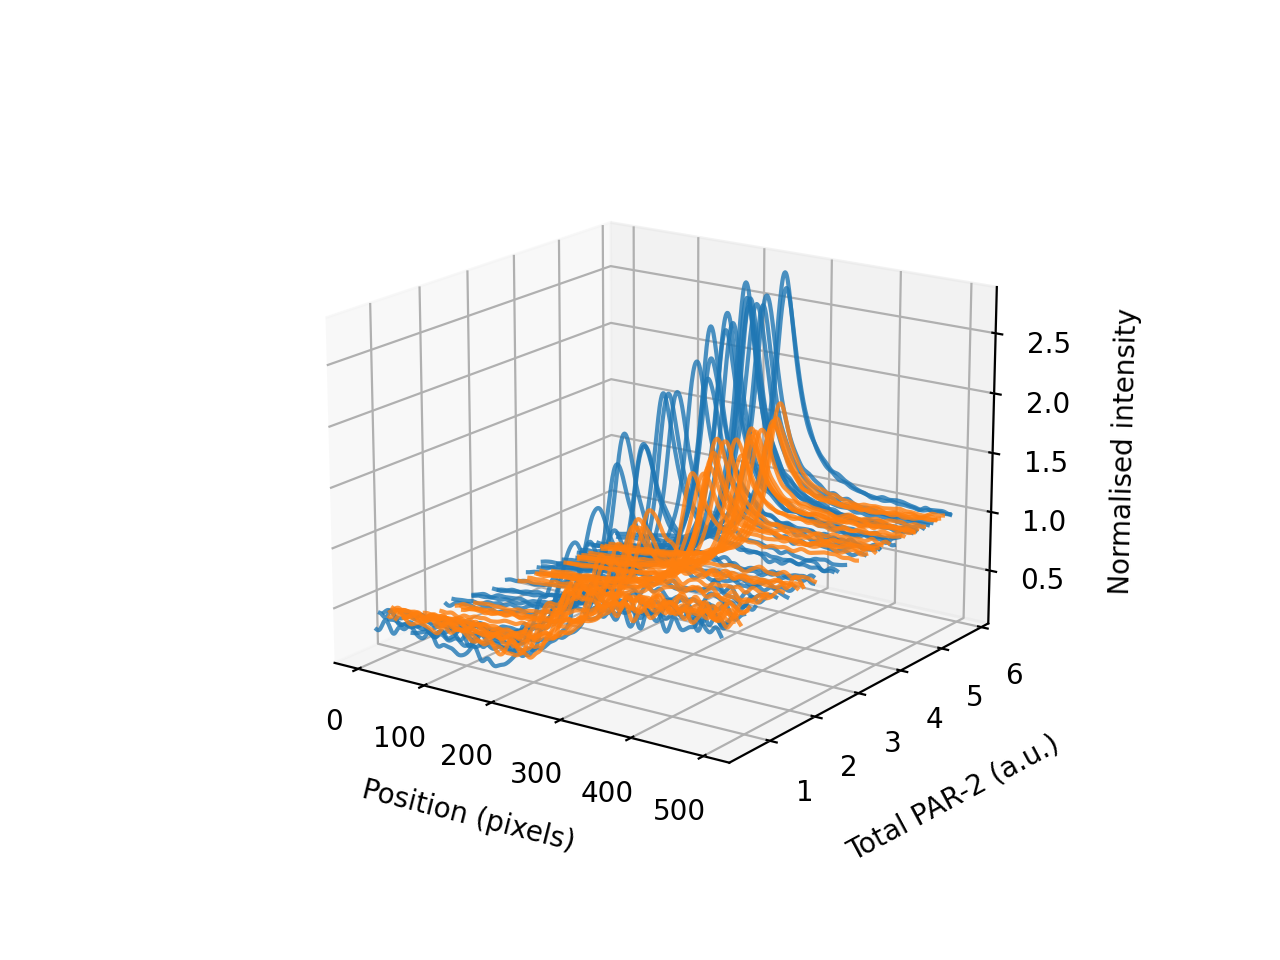

Text(0.5, 0, '\nPosition (pixels)')

In [22]:
ax = plt.axes(projection='3d')
condition = (df['Dosage_af'] > 500) * (df['Line'] == 'nwg201')
profs_norm_thresh = profs_norm[condition]
dosages_thresh = df['Dosage_af'][condition]
for d, p in zip(dosages_thresh, profs_norm_thresh):
    ax.plot(np.arange(n), np.ones(n) * d/ 1000, p, alpha=0.8, c='tab:blue')
    
condition = (df['Dosage_af'] > 500) * (df['Line'] == 'nwg246')
profs_norm_thresh = profs_norm[condition]
dosages_thresh = df['Dosage_af'][condition]
for d, p in zip(dosages_thresh, profs_norm_thresh):
    ax.plot(np.arange(n), np.ones(n) * d/ 1000, p, alpha=0.8, c='tab:orange')
    
ax.set_ylabel('\n\nTotal PAR-2 (a.u.)')
ax.set_zlabel('\nNormalised intensity')
ax.set_xlabel('\nPosition (pixels)')

In [9]:
ax = plt.axes(projection='3d')
condition = (df['Dosage_af'] > 500) * (df['Line'] == 'lp637')
profs_norm_thresh = profs_norm[condition]
dosages_thresh = df['Dosage_af'][condition]
for d, p in zip(dosages_thresh, profs_norm_thresh):
    ax.plot(np.arange(50), np.ones(50) * d, p, c='k', alpha=0.5)